# Realce de bordes

Como hemos visto en clase, la detección de bordes nos puede servir para hacer un proceso contrario al suavizado de una imagen, que denominamos realce de bordes. El obejtivo es, dada una imagen cualquier o una imagen algo difuminada, obtener otra imagen en la que los bordes de los objetos estén mucho más definidos. Para ello, vamos a implementar los dos algoritmos vistos en clase.

En primer lugar, implementa una función llamada realce_d2 que realice realce de bordes utilizando una aproximación de la segunda derivada. La función tomará una imagen, calculará la aproximación de la segunda derivada mediante un filtro de convolución y, a partir de un parámetro w, realice la operación
$$I'(u,v)=I(u,v)-w(I*H)(u,v)$$
donde $H$ es la máscara de convolución para la aproximación de la segunda derivada dada por H=[[0,1,0],[1,-4,1],[0,1,0]]

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def realce_d2(imagen, w):
    H = np.array([[0,1,0],[1,-4,1],[0,1,0]]) 
    imagen_amp = cv2.copyMakeBorder(imagen,1,1,1,1,cv2.BORDER_REPLICATE)
    imagen_aux = imagen.astype(np.float32)

    F,C = imagen.shape[0:2]
    for i in range(1, F + 1):
        for j in range(1, C + 1):
            ventana = imagen_amp[i-1:i+2, j-1:j+2]
            imagen_aux[i-1,j-1] = np.sum(ventana * H)
    
    imagen_final = np.clip((imagen - w*imagen_aux),0,255).astype(np.uint8)
    
    return imagen_final
    

Una vez implementada, lee la imagen arbol.jpg (imagen en color) que está colocada en la carpeta images. Diseña un pequeño código para llamar a realce_d2 con cada una de las componentes de color como si fuesen 3 imágenes diferentes y júntalas de nuevo en una nueva imagen. Prueba a comparar las imágenes realzadas con un factor de realce de 0.1, 0.5, etc.

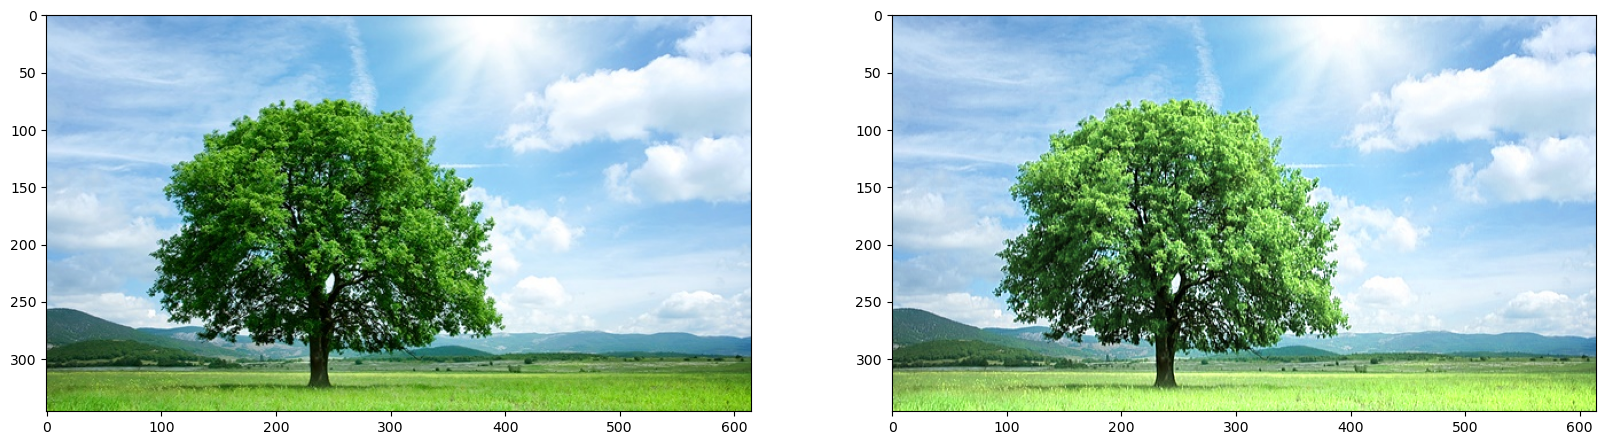

In [6]:
imagen = cv2.imread('images/arbol.jpg',1)
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
w = 0.1
imagen_final = realce_d2(imagen, w)

fig, axes = plt.subplots(1,2,figsize=(20,10))

axes[0].imshow(imagen)
axes[1].imshow(imagen_final)


Una vez implementado el algoritmo anterior, realiza una nueva función realce_f en el que, en lugar de realizar un filtro de segunda derivada, calcule un filtro de suavizado mediante un filtro gaussiano (en la práctica del detector de canny hay una función que genera filtros gaussianos). El tamaño y la desviación del filtro serán parámetros de entrada. Una vez calculado, la imagen realzada vendrá dada por
$$I'(u,v)=I(u,v)+a(I*H)(u,v)$$
donde $H$ es una máscara de convolución gaussiana y a es un parámetro de entrada.

In [ ]:
def realce_f(imagen, a, tam, sigma):
    